# Project 2
## Eniacs product strategy

Your analyse can finally settle an ongoing debate for the mgmt: whether or not it’s beneficial to discount products.

*Pro*\
Marketing Team Lead is convinced that offering discounts is beneficial in the long run:
1. discounts improve customer acquisition, satisfaction and retention, and allows the company to grow.

*Con*\
Main investors in the Board are worried about offering aggressive discounts:
1. recent quarterly results showed an increase in number of orders, but a decrease in the total revenue
2. focus in quality segment, rather than offer lowest prices in market

*Your analytical and business skills are needed to give clarity in the following aspects:*
- How products should be classified into different categories in order to simplify reports and analysis.
- What is the distribution of product prices across different categories.
- How many products are being discounted.
- (How big are the offered discounts as a percentage of the product prices.)
- (How seasonality and special dates (Christmas, Black Friday) affect sales.)
- (How could data collection be improved.)

`Present to company board your analysis (short and concise, but also engaging and convincing)`

## Brainstorming

Investigation and creating diagrams: 
1. ratio of discount products to monthly revenue --> Mahsa
2. qty of high-end products to monthly revenue --> Rias
3. Which are top products? (may be this question can be included to question no 4)
4. Categories --> Kristina
- NAS/ HDD
- Computer
- Phones
- Monitor
- Peripheries 

May be "50/50" soluation(?)
Depending on “yes” or “no” for discount product strategy:
Mix Marketing (4Ps)

###### product:....shape (__10579, 5), col: sku, name, desc, price, max_price_orderlines
###### orders:......shape (204691, 4), col: order_id, created_date, total_paid, state
###### orderlines..shape (293743, 8), col: id, id_order, product_id, product_quantity, sku, unit_price, date, total_price
###### brands:......shape (____187, 2), col: short, long

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.float_format = '{:.2f}'.format

In [2]:
path = 'eniac/clean/'
orderlines = pd.read_csv(path + 'orderlines_cl.csv')
orders = pd.read_csv(path + 'orders_cl.csv')
brands = pd.read_csv(path + 'brands_cl.csv')
products = pd.read_csv(path + 'products_cl.csv')

In [3]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

TRY&ERROR

In [95]:
tmp1 = (
products
    .loc[products['name'].str.contains(r'HDD','Apple')]
    .sort_values('price', ascending=False)
)
tmp1 # Monitor 272. Laptop 4, NAS 629

,sku,name,desc,price,max_price_orderlines
2848,PAC0925,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,2849.00,NaN
112,PAC0449,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) and ...,2399.00,NaN
2847,PAC0924,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 16GB...",IMac desktop computer 27 inch Retina 5K RAM 16...,2369.00,NaN
2807,APP1265,"Apple iMac 21.5 ""Core i7 33GHz 4K Retina Displ...",Desktop Apple iMac 21.5 inch screen Retina i7 ...,2209.00,NaN
6620,APP1259-A,"Open - Apple iMac 21.5 ""Core i7 33GHz 4K Retin...",Desktop Apple iMac 21.5 inch screen Retina i7 ...,2209.00,NaN
...,...,...,...,...,...
2004,QNA0018,QNAP HDD Tray black NAS System,HDD tray for QNAP NAS system.,11.99,NaN
358,SEV0026,Service installation RAM + HDD + SSD MacBook /...,RAM + HDD installation + SSD in your MacBook /...,NaN,59.99
365,SEV0024,Service installation RAM + HDD + SSD Mac mini,installation RAM HDD + SSD + on your Mac mini ...,NaN,59.99
366,SEV0025,Service installation RAM + HDD + SSD iMac,installation RAM HDD + SSD + on your iMac + Da...,NaN,474.96


In [96]:
tmp10 = (
orderlines
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .query('state == "Completed"')
    .merge(products, how='left', left_on='sku', right_on='sku')
)
tmp10.head(2) #62103 rows

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,order_id,created_date,total_paid,state,name,desc,price,max_price_orderlines
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,299545,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,NaN
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,299546,2017-01-01 01:57:34,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,NaN


In [83]:
tmp10.sort_values('total_paid', ascending=False).head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,order_id,created_date,total_paid,state,name,desc,price,max_price_orderlines
40528,1457614,448053,0,3,PAC1950,4462.59,2017-11-27 12:57:59,13387.77,448053,2017-11-27 12:59:51,13387.78,Completed,Apple Mac Pro 35GHz 6 cores | 64GB RAM | 512GB...,New Mac Pro with 64GB of RAM and two 6-core GP...,5369.00,NaN
24735,1329562,394981,0,1,PAC2136,2156.59,2017-08-31 12:16:11,2156.59,394981,2017-08-31 13:09:05,10586.97,Completed,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",IMac desktop computer 27 inch 5K Retina 16GB (...,2339.00,NaN


In [97]:
tmp10.drop(['id_order', 'product_id', 'sku', 'order_id', 'created_date', 'state'], axis=1, inplace=True)

In [98]:
tmp10.sort_values('total_paid', ascending=False).head(5)

,id,product_quantity,unit_price,date,total_price,total_paid,name,desc,price,max_price_orderlines
40528,1457614,3,4462.59,2017-11-27 12:57:59,13387.77,13387.78,Apple Mac Pro 35GHz 6 cores | 64GB RAM | 512GB...,New Mac Pro with 64GB of RAM and two 6-core GP...,5369.00,NaN
24735,1329562,1,2156.59,2017-08-31 12:16:11,2156.59,10586.97,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",IMac desktop computer 27 inch 5K Retina 16GB (...,2339.00,NaN
24736,1329583,3,1905.59,2017-08-31 12:31:03,5716.77,10586.97,"Apple Macbook Pro 13 ""Core i5 2.3GHz | 8GB | 5...",New MacBook Pro 13-inch Core i7 23 GHz with 8G...,1999.00,NaN
24739,1329590,1,2713.59,2017-08-31 12:33:08,2713.59,10586.97,"Apple Macbook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,2849.00,NaN
9962,1214705,1,63.20,2017-03-27 16:45:02,63.20,9987.76,IPad AppleCare Protection Plan,Apple Care extended warranty for iPad.,79.00,NaN


In [87]:
orders_compl = orders.query('state == "Completed"')

In [109]:
p_df = (
orders_compl
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
    .groupby(['year','month'])
    .agg({'total_paid':'sum'})
    .reset_index()
)
p_df

,year,month,total_paid
0,2017,Apr,486962.21
1,2017,Aug,722055.81
2,2017,Dec,1897507.75
3,2017,Feb,623896.30
4,2017,Jan,1191437.34
5,2017,Jul,1127172.80
6,2017,Jun,690049.94
7,2017,Mar,115937.31
8,2017,May,646147.86
9,2017,Nov,2949487.12


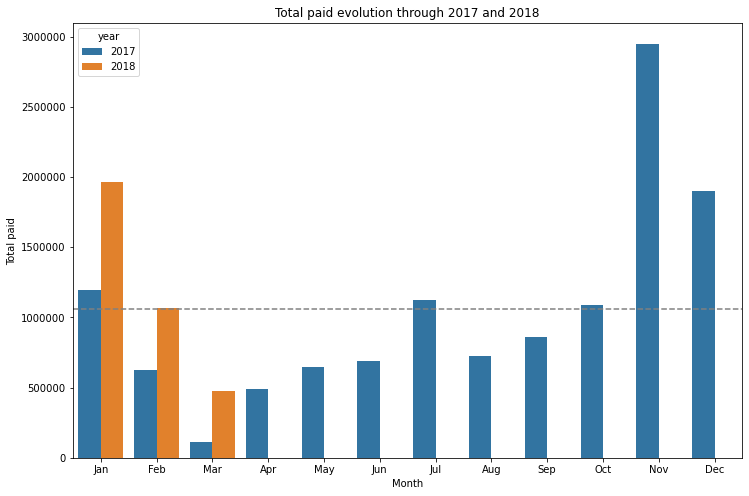

In [107]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplots(figsize=(12, 8))
# sns.boxplot(data=p_df, x='month', y='total_paid', hue='year', order=months)
# plt.ylim(0, 800)
p = sns.barplot(data=p_df, x='month', y='total_paid', hue='year', order=months)
p.axhline(
    p_df['total_paid'].mean(), 
    linestyle='--',
    color='gray'
)
plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
orders.head(2)

In [ ]:
orderlines.head(2)

In [ ]:
products.head(2)

In [ ]:
brands.head(2)